In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)

# 1. Data import

###              List of metrics:

<ul>
    <li>total_sessions_day{N} – number of user sessions on the day N;
    <li>total_sessions_day{N} – cumulative number of user sessions on the day N;
    <li>chapters_finished_day{N} – number of unique chapters finished in N days;
    <li>chapters_opened_day{N} – number of unique chapters opened in N days; 
    <li>chapters_closed_day{N} – number of unique chapters closed in N days;
    <li>diamonds_received_day{N} – number of diamonds received in N days;
    <li>diamonds_spent_day{N} – number of diamonds spent in N days; 
    <li>tickets_spent_day{N} – number of tickets spent in N days;
    <li>retained_day{N} – boolean variable that indicates user return on day N;
    <li>app_sub_ltv_day{N} – cumulative subscription revenue for day 5; 
    <li>app_iap_ltv_day{N} – cumulative revenue from tickets and diamonds purchases for day 5; 
    <li>ad_ltv_day{N} – cumulative ad revenue for day 5; 
    <li>chapters_finished_session{N} – number of unique book chapters finished in N sessions;
    <li>chapters_opened_session{N} – number of unique chapters opened in N sessions;
    <li>chapters_closed_session{N} – number of unique chapters closed in N sessions;
    <li>diamonds_spent_session{N} – number of diamonds spent in N sessions; 
    <li>tickets_spent_session{N} – number of tickets spent in N sessions; 
    <li>media_source – encoded trafic source through which the user learned about the game (Facebook, 
    Google etc);
    <li>install_date – game installation date;
    <li>country_code – user country code;
    <li>platform – the platform on which the game was installed (iOS/Android).  
</ul>
<ul>
    <li>target_sub_ltv_day30 – subscription revenue;
    <li>target_iap_ltv_day30 – revenue from tickets and diamonds purchases; 
    <li>target_ad_ltv_day30 – ad revenue.
</ul>
<ul>    
    <li>target_full_ltv_day30 = target_sub_ltv_day30 + target_iap_ltv_day30 + target_ad_ltv_day30
</ul>


In [2]:
df = pd.read_csv('TEST TASK (dataset).csv')

In [3]:
df.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,SOURCE_23,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,SOURCE_2,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,SOURCE_17,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,SOURCE_23,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,SOURCE_1,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [4]:
print(f'DataFrame size = {df.shape}')

DataFrame size = (1467832, 63)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [6]:
df.isnull().sum().sort_values(ascending=False)

total_sessions_day7        1374
total_sessions_day3        1368
total_sessions_day1        1367
total_sessions_day0        1365
diamonds_spent_session1       0
                           ... 
tickets_spent_day3            0
tickets_spent_day7            0
retained_day1                 0
retained_day3                 0
target_full_ltv_day30         0
Length: 63, dtype: int64

##### There are "Null" values in data. Let`s change these values to 0

In [7]:
IsNull = df.isnull().sum().sort_values(ascending=False).head(4).index
for item in range(len(IsNull)):
    df[IsNull[item]] = df[IsNull[item]].fillna(0)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sessions_day0,1467832.0,1.845580,2.530274,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day1,1467832.0,2.191869,3.620912,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day3,1467832.0,2.606548,5.345442,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day7,1467832.0,3.110570,7.884984,0.000000,1.0,1.0,2.0,905.000000
chapters_finished_day0,1467832.0,1.234763,3.048333,0.000000,0.0,0.0,1.0,73.000000
chapters_finished_day1,1467832.0,1.498150,3.975010,0.000000,0.0,0.0,1.0,359.000000
chapters_finished_day3,1467832.0,1.772233,5.033945,0.000000,0.0,0.0,1.0,360.000000
chapters_finished_day7,1467832.0,2.055170,6.325564,0.000000,0.0,0.0,1.0,360.000000
chapters_opened_day0,1467832.0,2.099693,3.117375,0.000000,1.0,1.0,2.0,77.000000
chapters_opened_day1,1467832.0,2.382293,4.077269,0.000000,1.0,1.0,2.0,360.000000


##### Let`s delete data outliers with min < 0 

In [9]:
for item in df.select_dtypes(include=['float64','int64']).min().index:
     df = df.drop(df[df[item] < 0].index, axis=0)

# Data analysis

###            Hypotheses

<ol>
    <li> Income depends on user platfom
    <li> The more chapters finished, the bigger subscription revenue
    <li> Income depends on country
    <li> The more tickets spent, the bigger revenue from tickets and diamonds purchases
    <li> Income depends on media resource
</ol>

## Target

<p><font size='4px'>Let`s analyse the variable we are predicting</font></p>

Количество ios:  580404
Количество android:  887424


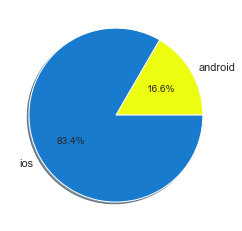

<Figure size 432x288 with 0 Axes>

In [10]:
sns.set(rc={'figure.figsize':(7, 5)})
x1 = df['platform'].unique()
y1 = df.groupby(df['platform']).agg({'target_full_ltv_day30': 'mean'})
y1 = y1['target_full_ltv_day30'].sort_values(ascending=False).head(2)
x = y1.index

graph1 = df.groupby('platform', as_index = False).agg({'target_full_ltv_day30': "mean"})
labels = ['android', 'ios']

plt.pie(graph1['target_full_ltv_day30'], labels=labels, autopct='%1.1f%%', shadow=True, colors=['#ecfd12', '#187bcd'])
plt.figure()

print('Количество ios: ', df[df['platform'] == 'ios'].shape[0])
print('Количество android: ', df[df['platform'] == 'android'].shape[0])


# y = df.groupby(df['platform']).agg({'target_full_ltv_day30': 'mean'}) 
# sns.barplot(data=df[["target_full_ltv_day30", "platform"]], x=x1, y=y['target_full_ltv_day30'].sort_values(ascending=False).head(2))

<p><font size='3px'>Hypothesis №1 is confirmed. </font></p>

Text(0.5, 0, 'Finishhed chapters in 7 days')

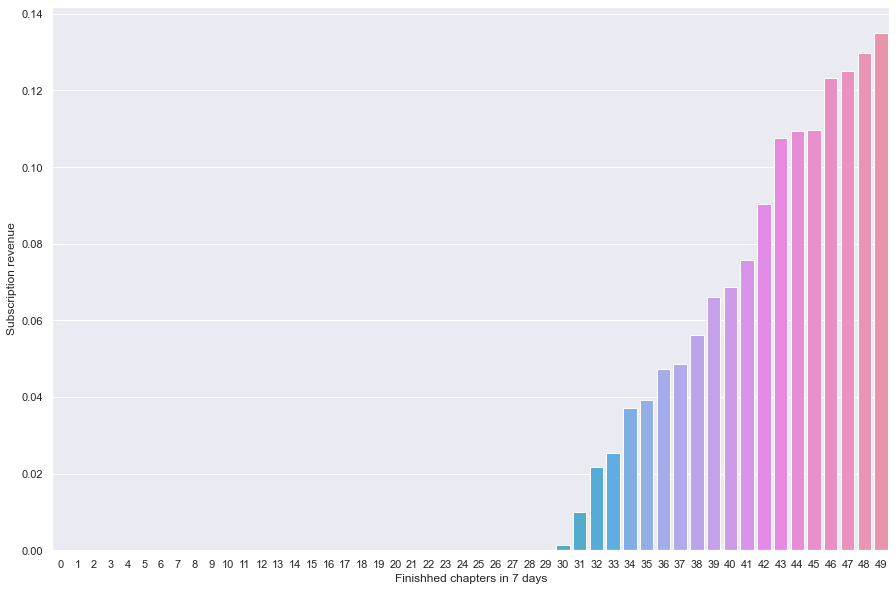

In [11]:
y = df.groupby(df['chapters_finished_day7']).agg({'target_sub_ltv_day30': 'mean'}).sort_values(by='chapters_finished_day7').head(50) 
x = df['chapters_finished_day7'].unique() 

x = y.index 
sns.set(rc={'figure.figsize':(15, 10)}) 
y = df.groupby(df['chapters_finished_day7']).agg({'target_sub_ltv_day30': 'mean'})  
sns.barplot(data=df[["target_sub_ltv_day30", "chapters_finished_day7"]], x=x, y=y['target_sub_ltv_day30'].sort_values().head(50))
plt.ylabel("Subscription revenue")
plt.xlabel("Finishhed chapters in 7 days")

<p><font size='3px'>Hypothesis №2 is confirmed. </font></p>

Text(0.5, 0, 'Country code')

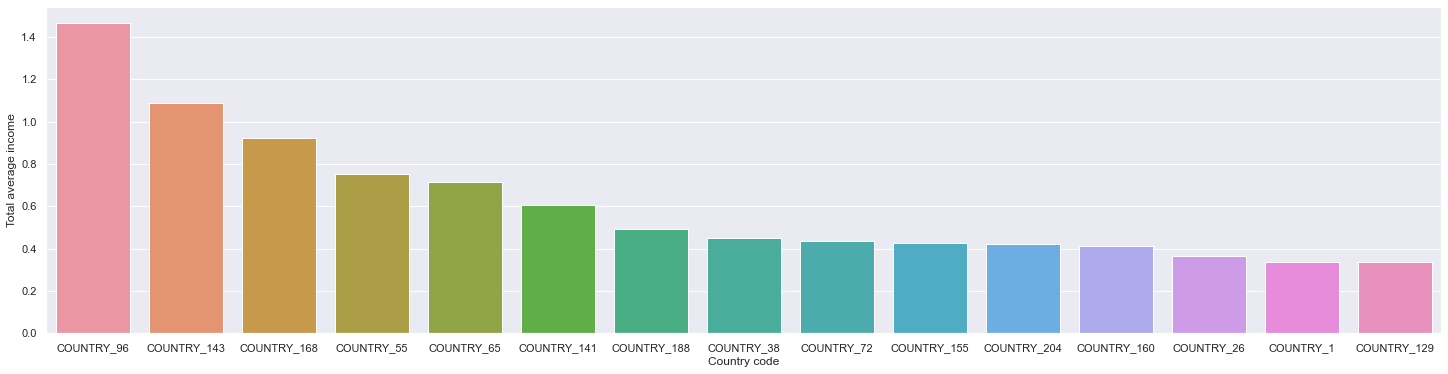

In [12]:
y = df.groupby(df['country_code']).agg({'target_full_ltv_day30': 'mean'})
x = df['country_code'].unique()
y = y['target_full_ltv_day30'].sort_values(ascending=False).head(15)
x = y.index
sns.set(rc={'figure.figsize':(25, 6)})
y = df.groupby(df['country_code']).agg({'target_full_ltv_day30': 'mean'}) 
sns.barplot(data=df[["target_full_ltv_day30", "country_code"]], x=x, y=y['target_full_ltv_day30'].sort_values(ascending=False).head(15))
plt.ylabel("Total average income")
plt.xlabel("Country code")

<p><font size='3px'>Hypothesis №3 is confirmed. </font></p>

Text(0.5, 0, 'Tickets spent in 9 sessions')

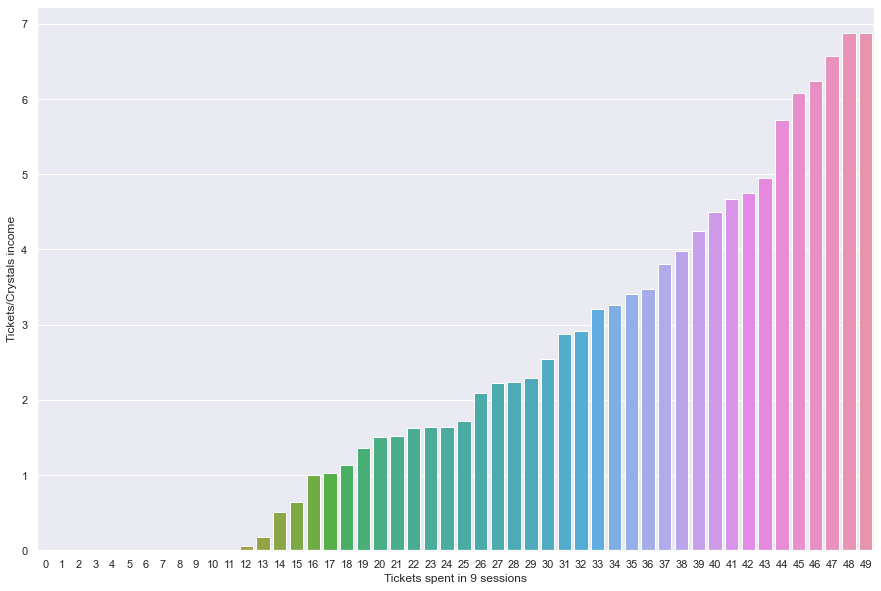

In [13]:
y = df.groupby(df['tickets_spent_session9']).agg({'target_iap_ltv_day30': 'mean'}).sort_values(by='tickets_spent_session9').head(50) 
x = df['tickets_spent_session9'].unique() 

x = y.index 
sns.set(rc={'figure.figsize':(15, 10)}) 
y = df.groupby(df['tickets_spent_session9']).agg({'target_iap_ltv_day30': 'mean'})  
sns.barplot(data=df[["target_iap_ltv_day30", "tickets_spent_session9"]], x=x, y=y['target_iap_ltv_day30'].sort_values().head(50))
plt.ylabel("Tickets/Crystals income")
plt.xlabel("Tickets spent in 9 sessions")

<p><font size='3px'>Hypothesis №4 is confirmed. </font></p>

Text(0.5, 0, 'Media source')

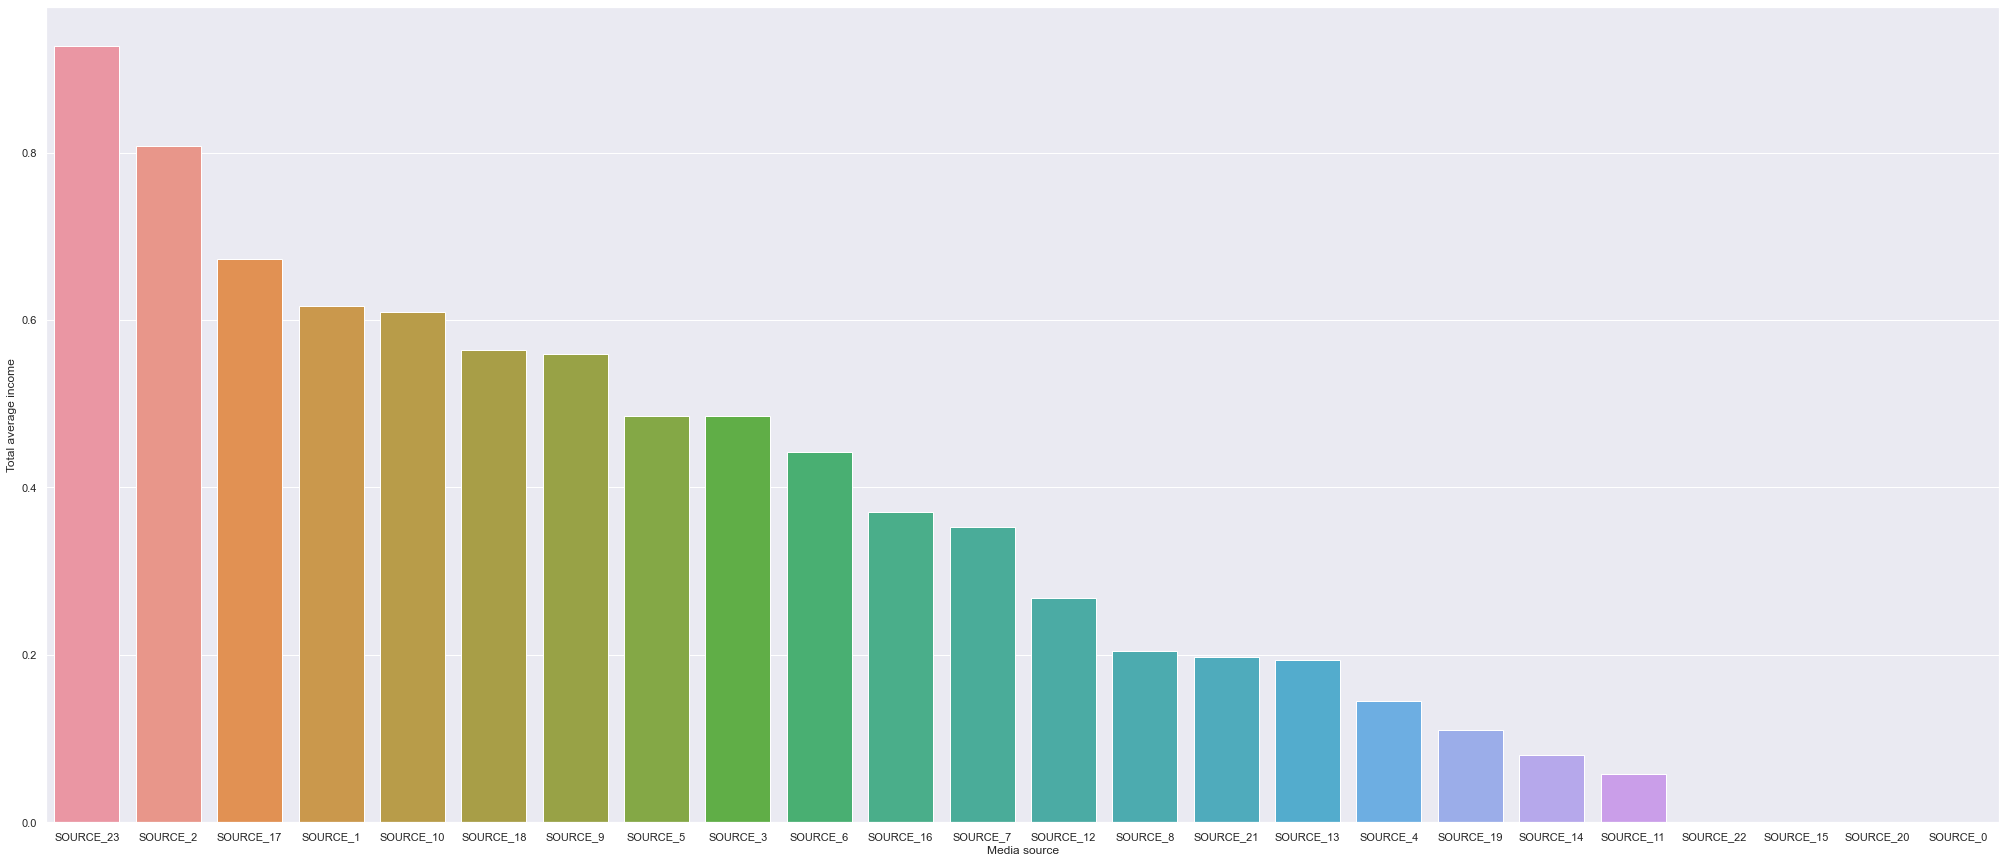

In [14]:
x2 = df['media_source'].unique()
y2 = df.groupby(df['media_source']).agg({'target_full_ltv_day30': 'mean'})
y2 = y2['target_full_ltv_day30'].sort_values(ascending=False).head(24)
x = y.index
sns.set(rc={'figure.figsize':(35, 15)})
y = df.groupby(df['media_source']).agg({'target_full_ltv_day30': 'mean'}) 
sns.barplot(data=df[["target_full_ltv_day30", "media_source"]], x=x2, y=y['target_full_ltv_day30'].sort_values(ascending=False).head(24))
plt.ylabel("Total average income")
plt.xlabel("Media source")

<p><font size='3px'>Hypothesis №5 is confirmed. </font></p>

<AxesSubplot:>

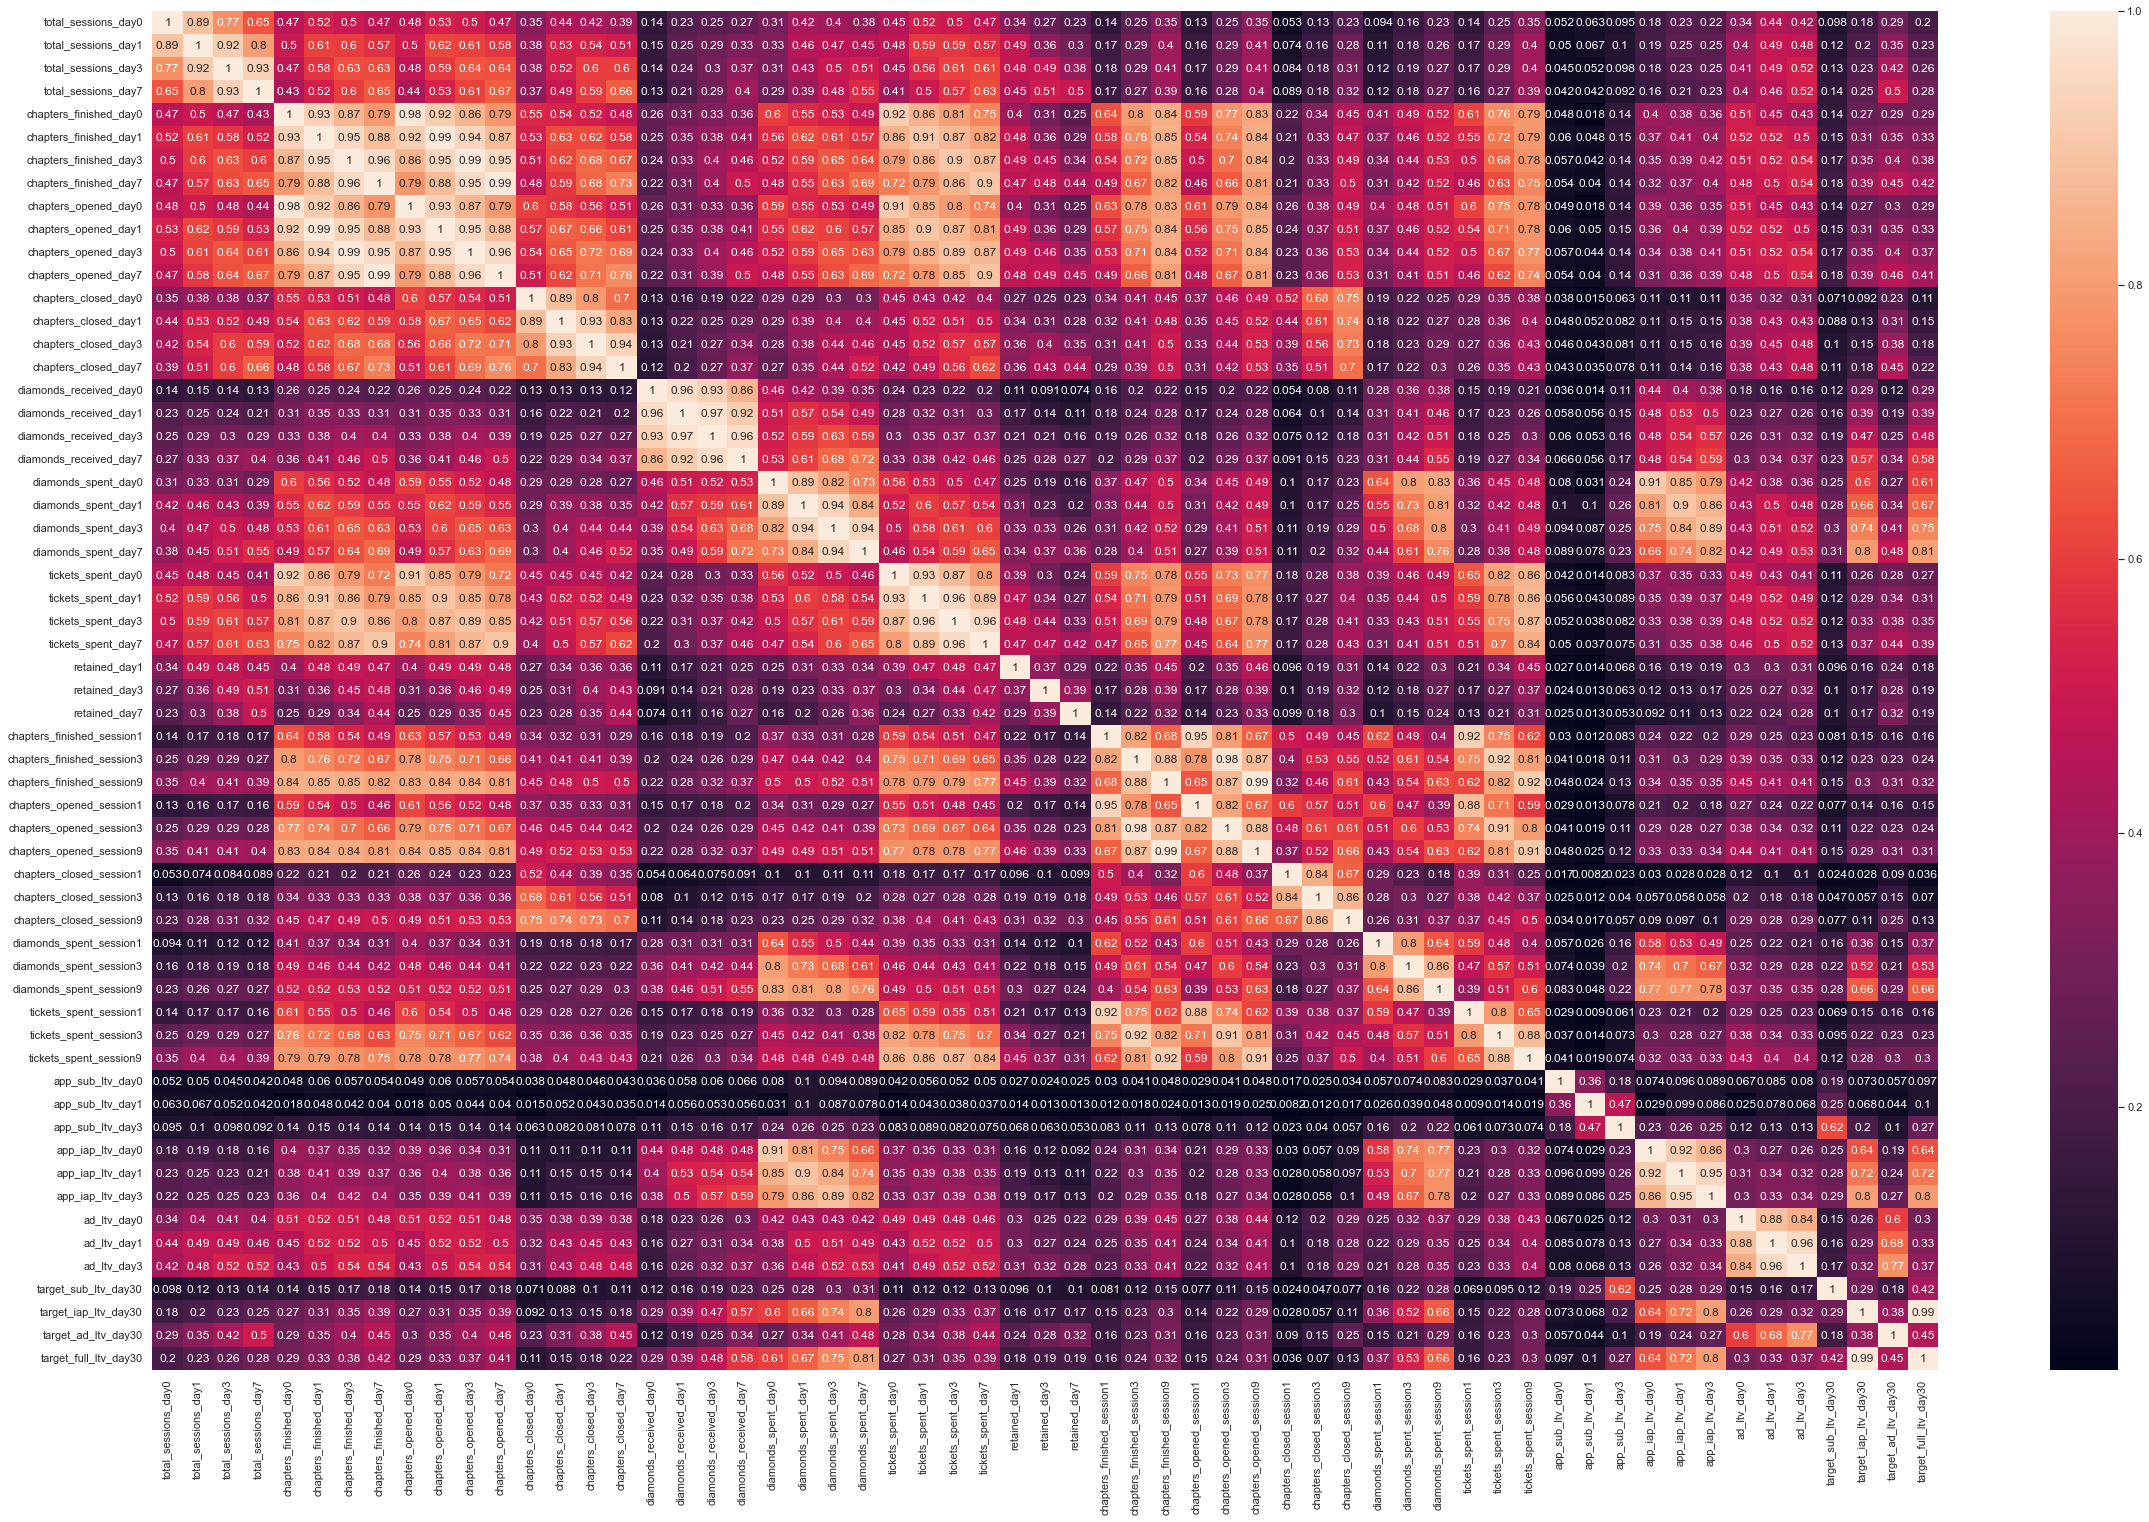

In [15]:
sns.set(rc={'figure.figsize':(40, 25)})
sns.heatmap(df.corr(), annot=True)

# Saving DataFrame

In [20]:
df.platform.replace(to_replace=['ios','android'],value = [1,0],inplace=True)
df.to_csv('Analyzed_DataFrame.csv') 